# Import libraries and main MIMIIC3 tables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
from datetime import datetime
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#patient table analysis
dfp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/PATIENTS.csv')

In [ ]:
print(dfp.shape)
dfp.head(5)

(46520, 8)


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [ ]:
dfp.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [ ]:
#notevents table analysis
dfn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/NOTEEVENTS.csv')

In [ ]:
print(dfn.shape)
dfn.head(5)

(2083180, 11)


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
#admission able analysis
dfa =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/ADMISSIONS.csv')

In [ ]:
print(dfa.shape)
dfa.head(5)

(58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [ ]:
dfd =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/DIAGNOSES_ICD.csv')
print(dfd.shape)
dfd.head(5)

(651047, 5)


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


# Exploratory Data Analysis and Data preparation

Noteevents table shape: (2083180, 11)
Diagnoses table shape: (651047, 5)
Number of unique patients in Noteevents table: 46146
Number of unique patients in Diagnoses table: 46520


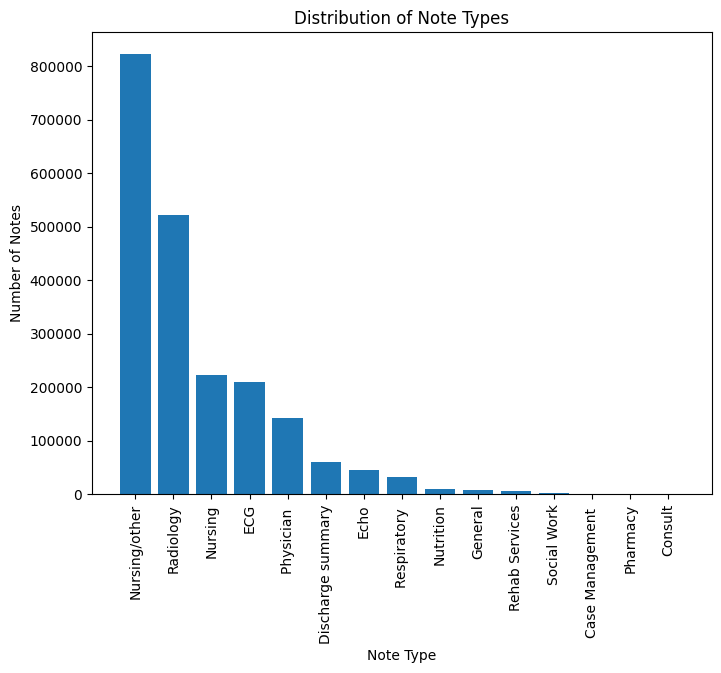

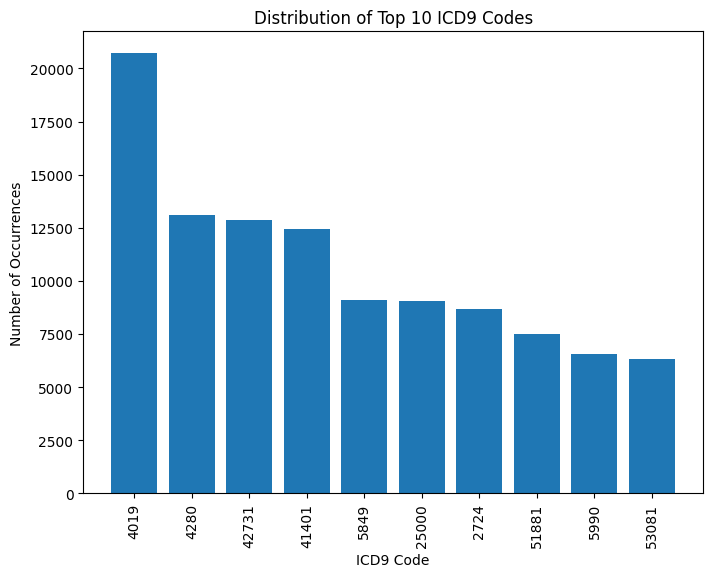

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset
noteevents_df = dfn.copy()
diagnoses_df = dfd.copy()

# Print the shape of each table
print(f'Noteevents table shape: {noteevents_df.shape}')
print(f'Diagnoses table shape: {diagnoses_df.shape}')

# Print the number of unique patients in each table
print(f'Number of unique patients in Noteevents table: {len(noteevents_df["SUBJECT_ID"].unique())}')
print(f'Number of unique patients in Diagnoses table: {len(diagnoses_df["SUBJECT_ID"].unique())}')

# Plot the distribution of note types in the Noteevents table
note_types = noteevents_df['CATEGORY'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(note_types.index, note_types.values)
plt.title('Distribution of Note Types')
plt.xlabel('Note Type')
plt.ylabel('Number of Notes')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of ICD9 codes in the Diagnoses table
icd9_codes = diagnoses_df['ICD9_CODE'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.bar(icd9_codes.index, icd9_codes.values)
plt.title('Distribution of Top 10 ICD9 Codes')
plt.xlabel('ICD9 Code')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()


In [ ]:
dfa.dtypes

ROW_ID                   int64
SUBJECT_ID               int64
HADM_ID                  int64
ADMITTIME               object
DISCHTIME               object
DEATHTIME               object
ADMISSION_TYPE          object
ADMISSION_LOCATION      object
DISCHARGE_LOCATION      object
INSURANCE               object
LANGUAGE                object
RELIGION                object
MARITAL_STATUS          object
ETHNICITY               object
EDREGTIME               object
EDOUTTIME               object
DIAGNOSIS               object
HOSPITAL_EXPIRE_FLAG     int64
HAS_CHARTEVENTS_DATA     int64
dtype: object

In [ ]:
dfp.dtypes

ROW_ID          int64
SUBJECT_ID      int64
GENDER         object
DOB            object
DOD            object
DOD_HOSP       object
DOD_SSN        object
EXPIRE_FLAG     int64
dtype: object

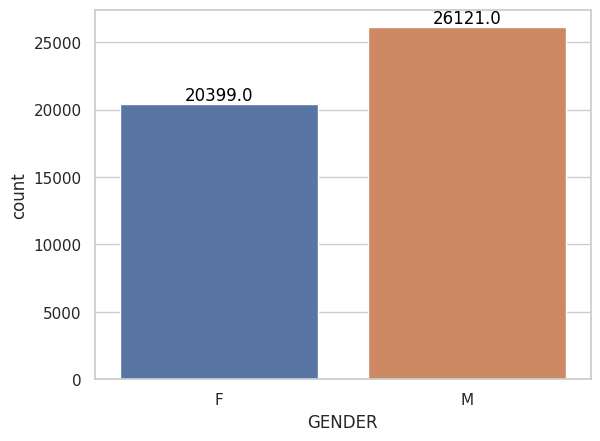

In [ ]:
#Patients representation in the MIMIIC III database
sns.set(style="whitegrid")  # Set a white grid background (optional)

# Create the countplot
ax = sns.countplot(data=dfp, x='GENDER')

# Add annotations with exact counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()


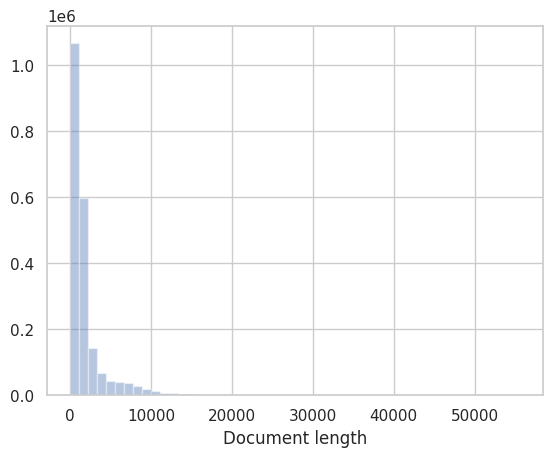

In [ ]:
# the distribution of document TEXT lengths in Notevents table
lns = [len(str(x)) for x in dfn['TEXT']]
sns.distplot(lns, kde=False, axlabel='Document length')
plt.show()

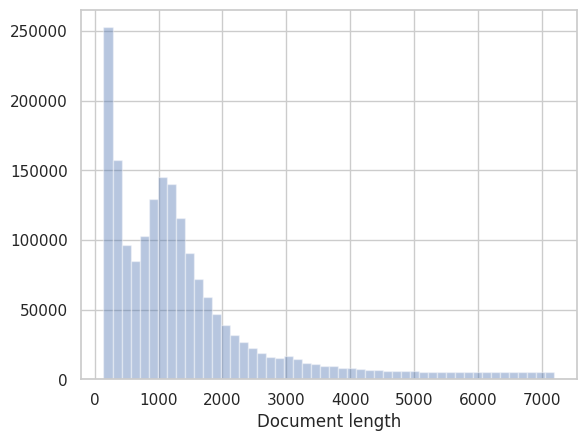

In [ ]:
# Sort lengths
lns.sort()
# Take 5% as the removal size
rm_size = int(len(lns) / 100) * 5

# Now plot with removal of most/least frequent
sns.distplot(lns[rm_size:-rm_size], kde=False, axlabel='Document length')
plt.show()

In [ ]:
# Remove rows from the dataframe based on document length, this is not really
#straightforward, so we'll approximate it and find the document length that is used as a cutoff and remove outliers!
min_ln = max(lns[0:rm_size])
max_ln = min(lns[-rm_size:])

dfn = dfn[[True if len(str(x)) > min_ln and len(str(x)) < max_ln else False for x in dfn['TEXT']]]
dfn.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
8,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...


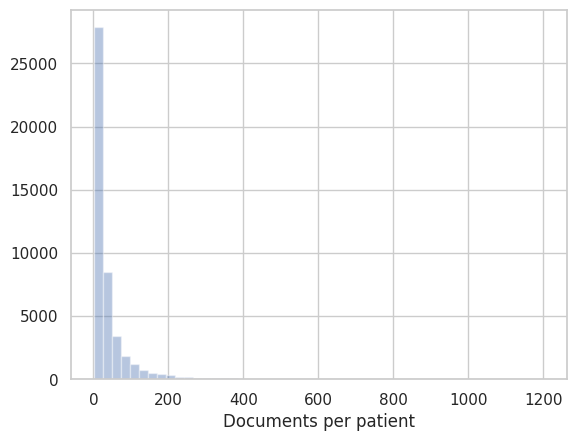

In [ ]:
#Number of document per patient
sns.distplot(dfn['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()


In [ ]:
print(f"Length after cleaning : {len(dfn)}")
noteevents_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/NOTEEVENTS.csv')
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1874558
Length of the original: 2083180


In [ ]:

# Again a bit of clean-up, let's remove the bottom/top 1% of patients based on the number of
#documents they have.
docs_per_pt = dfn['SUBJECT_ID'].value_counts()
docs_per_pt_vals = docs_per_pt.values
docs_per_pt_vals.sort()

rm_size = int(len(docs_per_pt_vals) / 100) * 1
min_ln = max(docs_per_pt_vals[0:rm_size])
max_ln = min(docs_per_pt_vals[-rm_size:])

keep_subject_id = set([k for k, v in docs_per_pt.iteritems() if v > min_ln and v < max_ln])
dfn = dfn[[True if subject_id in keep_subject_id else False
                  for subject_id in dfn['SUBJECT_ID'].values]]
dfn.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
8,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...


In [ ]:
print(f"Length after cleaning : {len(dfn)}")
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1148653
Length of the original: 2083180


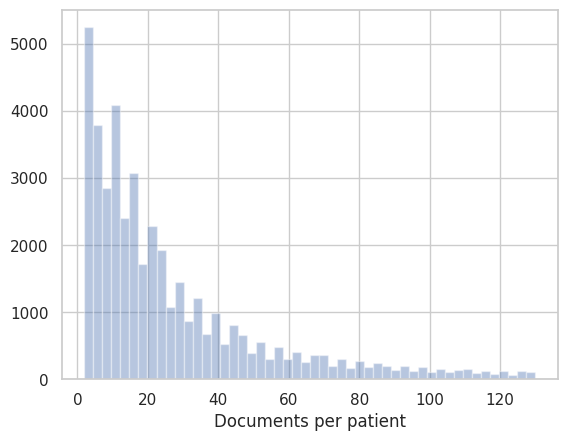

In [ ]:
sns.distplot(dfn['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()

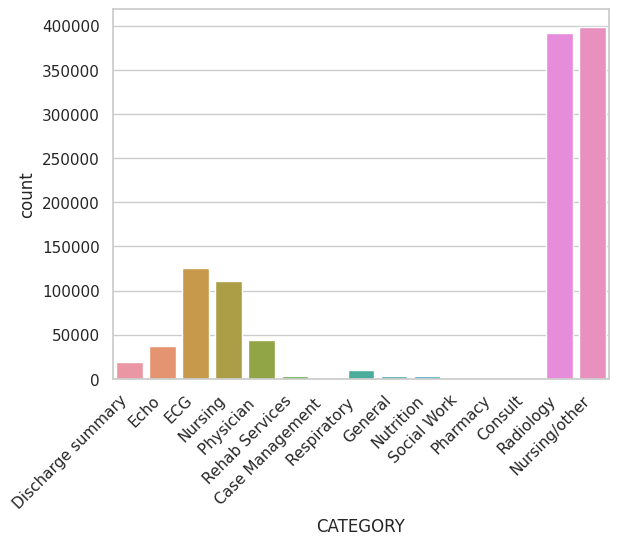

In [ ]:
#There are different source of document patient
# Convert 'CATEGORY' column to string if not already done
dfn['CATEGORY'] = dfn['CATEGORY'].astype(str)

# Define the order of categories explicitly
category_order = dfn['CATEGORY'].unique()

# Create a count plot with specified category order
plot = sns.countplot(data=dfn, x='CATEGORY', order=category_order)
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# Convert to pandas dates
dfn['CHARTDATE'] = pd.to_datetime(dfn['CHARTDATE'])
dfp['DOB'] = pd.to_datetime(dfp['DOB'])

In [ ]:
# Add a year column
dfn['create_year'] = pd.DatetimeIndex(dfn['CHARTDATE']).year
dfp['dob_year'] = pd.DatetimeIndex(dfp['DOB']).year

In [ ]:
# Joint noteevents with patients
pt_notes = dfn.merge(dfp, on='SUBJECT_ID', how='left')

In [ ]:
pt_notes['age_year'] = pt_notes['create_year'] - pt_notes['dob_year']

In [ ]:
# Remove patients older than 89 and younger than 16
pt_notes = pt_notes[pt_notes['age_year'] >= 16]
pt_notes = pt_notes[pt_notes['age_year'] <= 89]

In [ ]:
# It is possible that the cleaning above created some patients with only one document
print("Number of patients with only one doc: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))

Number of patients with only one doc: 1


In [ ]:
# Remove it there are any
remove_subject = set([k for k, v in pt_notes['SUBJECT_ID'].value_counts().iteritems() if v == 1])
pt_notes = pt_notes[~pt_notes.SUBJECT_ID.isin(remove_subject)]
print("After removal: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))

After removal: 0


In [ ]:

# We'll do the following to make sure patients do not have documents that span
#over multiple years, meaning their age would change.
dif_pt = {}
for ind, row in pt_notes.iterrows():
    sid = row['SUBJECT_ID']
    if sid in dif_pt:
        dif_pt[sid].append(row['age_year'])
    else:
        dif_pt[sid] = [row['age_year']]

ehr_length = []
median_age = []
for v in dif_pt.values():
    mx = max(v)
    mi = min(v)
    median_age.append(np.median(v))
    ehr_length.append(mx - mi)

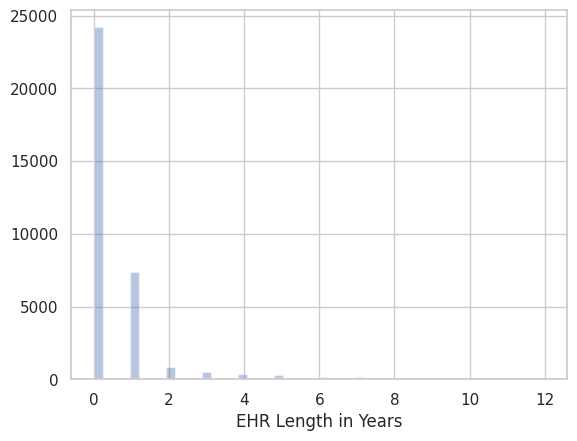

In [ ]:
# We show this mainly to be sure that most patients have an EHR that spans less than 1 year
sns.distplot(ehr_length, kde=False, axlabel='EHR Length in Years')
plt.show()

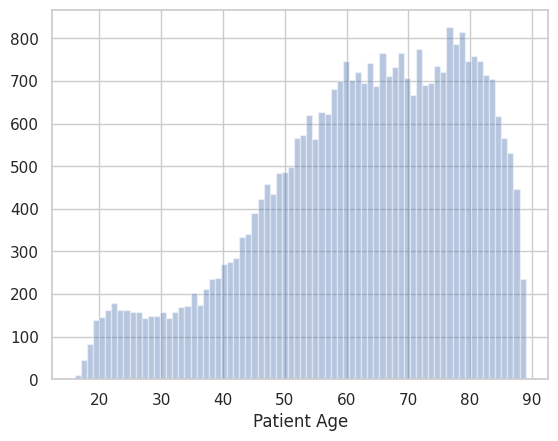

In [ ]:
sns.distplot([np.round(x) for x in median_age], kde=False, bins=74, axlabel='Patient Age')
plt.show()

In [ ]:
# Number of patients after/before cleaning
print(len(pt_notes['SUBJECT_ID'].unique()))
print(len(noteevents_original['SUBJECT_ID'].unique()))

34091
46146


In [ ]:
# Document length after/before cleaning
print(np.average([len(str(x)) for x in pt_notes['TEXT']]))
print(np.average([len(str(x)) for x in noteevents_original['TEXT']]))

1587.4992115085358
1826.0115736518208


In [ ]:
# Number of documents after/before cleaning
print(len(pt_notes))
print(len(noteevents_original))

959427
2083180


In [ ]:
# Min number of documents per patient after/before cleaning
print(min(pt_notes['SUBJECT_ID'].value_counts().values))
print(min(noteevents_original['SUBJECT_ID'].value_counts().values))

2
1


In [ ]:
# Max number of documents per patient after/before cleaning
print(max(pt_notes['SUBJECT_ID'].value_counts().values))
print(max(noteevents_original['SUBJECT_ID'].value_counts().values))

130
1420


In [ ]:
# Save the new patient_clinical_notes dataframe
#pt_notes.to_csv("/content/drive/MyDrive/Colab Notebooks/csv/pt_notes.csv", index=False)

# Working on Admission table and new pt_notes table in order to extract text dataset

In [ ]:
pt_notes.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'create_year', 'ROW_ID_y', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP',
       'DOD_SSN', 'EXPIRE_FLAG', 'dob_year', 'age_year'],
      dtype='object')

In [ ]:
pt_notes.TEXT[34]

'Admission Date:  [**2128-5-12**]       Discharge Date:  [**2128-5-18**]\n\nDate of Birth:   [**2067-10-12**]       Sex:  M\n\nService:  #58\n\nHISTORY OF PRESENT ILLNESS:  The patient is a 60 year-old\ngentleman with a past medical history of a right frontal\nantiplastic oligodendroglioma status post resection in [**5-/2124**]\nand 3/[**2128**].  He was just recently discharged from [**Hospital1 346**] after the most recent resection of\nthis tumor and was sent to [**Hospital **] Rehab where he developed\na headache.  A CT scan showed postop changes without\nexcessive edema or midline shift and the patient was sent\nback to [**Hospital **] Rehab.  Upon return he was noted to have\ndeveloped a fever to 103 axillary and the patient was noted\nto be more lethargic with mental status changes, so he was\nsent back to the Emergency Room for reevaluation.\n\nPAST MEDICAL HISTORY:  As above.\n\nALLERGIES:  Percocet.  The patient now reports a history of\nitching red rash from Percocet.\n\nPHY

In [ ]:
pt_notes.shape

(959427, 21)

In [ ]:
dfa.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [ ]:
dfa.ADMISSION_TYPE.value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [ ]:

# convert to dates
dfa.ADMITTIME = pd.to_datetime(dfa.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
dfa.DISCHTIME= pd.to_datetime(dfa.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
dfa.DEATHTIME = pd.to_datetime(dfa.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [ ]:
# sort by subject_ID and admission date
dfa = dfa.sort_values(['SUBJECT_ID','ADMITTIME'])
dfa = dfa.reset_index(drop = True)

In [ ]:
# add the next admission date and type for each subject using groupby
# you have to use groupby otherwise the dates will be from different subjects
dfa['NEXT_ADMITTIME'] = dfa.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
# get the next admission type
dfa['NEXT_ADMISSION_TYPE'] = dfa.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [ ]:
# get rows where next admission is elective and replace with naT or nan
rows = dfa.NEXT_ADMISSION_TYPE == 'ELECTIVE'
dfa.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
dfa.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN

In [ ]:
# sort by subject_ID and admission date
# it is safer to sort right before the fill in case something changed the order above
dfa = dfa.sort_values(['SUBJECT_ID','ADMITTIME'])
# back fill (this will take a little while)
dfa[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = dfa.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [ ]:
dfa['DAYS_NEXT_ADMIT']=  (dfa.NEXT_ADMITTIME - dfa.DISCHTIME).dt.total_seconds()/(24*60*60)

In [ ]:
average_days_next_admit = dfa['DAYS_NEXT_ADMIT'].mean()
print(f"Average days between consecutive admissions: {average_days_next_admit:.2f} days")


Average days between consecutive admissions: 409.24 days


In [ ]:
# Focus on most important Category: filter to discharge summary
df_notes_dis_sum = pt_notes.loc[pt_notes.CATEGORY == 'Discharge summary']

In [ ]:
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [ ]:
df_adm_notes = pd.merge(dfa[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']],
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
assert len(dfa) == len(df_adm_notes), 'Number of rows increased'

In [ ]:
df_adm_notes.TEXT.isnull().sum() / len(df_adm_notes)

0.7611570808464461

In [ ]:
#checking df_adm emptiness:
df_adm_notes.isnull().sum()

SUBJECT_ID             0
HADM_ID                0
ADMITTIME              0
DISCHTIME              0
DAYS_NEXT_ADMIT    47577
NEXT_ADMITTIME     47577
ADMISSION_TYPE         0
DEATHTIME          53122
TEXT               44890
dtype: int64

In [ ]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.572671
EMERGENCY    0.756745
NEWBORN      1.000000
URGENT       0.581587
dtype: float64

In [ ]:
df_adm_notes.head(10)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NEWBORN,NaT,NaN
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,NaN
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,NaN
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NEWBORN,NaT,NaN
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...
5,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NaT,NEWBORN,NaT,NaN
6,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NaT,NEWBORN,NaT,NaN
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,NaN,NaT,EMERGENCY,2149-11-14 10:15:00,"Name: [**Known lastname 10050**], [**Known fi..."
8,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NaT,NEWBORN,NaT,NaN
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,EMERGENCY,NaT,NaN


In [ ]:
pt_notes.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'create_year', 'ROW_ID_y', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP',
       'DOD_SSN', 'EXPIRE_FLAG', 'dob_year', 'age_year'],
      dtype='object')

In [ ]:
pt_notes.shape

(959427, 21)

In [ ]:
df_adm_notes.shape

(58976, 9)

In [ ]:
print ("Number of unique ICD Codes: " + str(df_adm_notes.nunique().shape[0]))

Number of unique ICD Codes: 9


In [ ]:
df_adm_notes.loc[17]

SUBJECT_ID                                                        20
HADM_ID                                                       157681
ADMITTIME                                        2183-04-28 09:45:00
DISCHTIME                                        2183-05-03 14:45:00
DAYS_NEXT_ADMIT                                                  NaN
NEXT_ADMITTIME                                                   NaT
ADMISSION_TYPE                                              ELECTIVE
DEATHTIME                                                        NaT
TEXT               Admission Date:  [**2183-4-28**]       Dischar...
Name: 17, dtype: object

In [ ]:
df_adm_notes.TEXT[17]

"Admission Date:  [**2183-4-28**]       Discharge Date:  [**2183-5-3**]\n\nDate of Birth:   [**2107-6-13**]       Sex:  F\n\nService:  Cardiothoracic Surgery\n\nHISTORY OF PRESENT ILLNESS:  This is a 65 year old female\nwith a 20 year history of hypertension and a ten year history\nof Type 2 diabetes who demonstrated a positive exercise\nstress test in [**2183-3-1**] suggestive for possible coronary\nartery disease.  The patient received a stress test as part\nof a risk stratification workup and at no point demonstrated\nany evidence of chest pain.  A subsequent exercise MIBI study\nperformed [**2183-3-28**] revealed an exercise capacity of\nonly 2 minutes 15 seconds on the [**Doctor First Name **] protocol.  There was\nno chest pain noted on the test and the peak exercise\nelectrocardiogram showed 1.5 to 2 mm horizontal to upsloping\nST depression in the inferior leads and in V1 and V2.\nImaging studies revealed a large apical to a small anterior\ndefect that was reversible.  The pati

Admission Date:  [**2183-4-28**]       Discharge Date:  [**2183-5-3**]

Date of Birth:   [**2107-6-13**]       Sex:  F

Service:  Cardiothoracic Surgery

HISTORY OF PRESENT ILLNESS:  This is a 65 year old female
with a 20 year history of hypertension and a ten year history
of Type 2 diabetes who demonstrated a positive exercise
stress test in [**2183-3-1**] suggestive for possible coronary
artery disease.  The patient received a stress test as part
of a risk stratification workup and at no point demonstrated
any evidence of chest pain.  A subsequent exercise MIBI study
performed [**2183-3-28**] revealed an exercise capacity of
only 2 minutes 15 seconds on the [**Doctor First Name **] protocol.  There was
no chest pain noted on the test and the peak exercise
electrocardiogram showed 1.5 to 2 mm horizontal to upsloping
ST depression in the inferior leads and in V1 and V2.
Imaging studies revealed a large apical to a small anterior
defect that was reversible.  The patient's ejection fraction
was noted to be 56% with normal wall motion.  The patient
subsequently underwent a cardiac catheterization on [**2183-4-22**] which demonstrated three vessel coronary artery disease
and mild diastolic ventricular dysfunction.  The patient was
thereafter referred to Dr. [**First Name8 (NamePattern2) **] [**Last Name (NamePattern1) 1537**] for surgical
evaluation and was subsequently scheduled for a coronary
artery bypass graft on [**2183-4-28**].

HOSPITAL COURSE:  On [**2183-4-28**], the patient underwent a
coronary artery bypass graft times three with grafts from the
left internal mammary artery to the left anterior descending,
saphenous vein graft to the right coronary artery and
saphenous vein graft to the obtuse marginal.  The patient
tolerated the procedure well.  The patient's pericardium was
left open.  Lines were placed including an arterial line and
a Swan-Ganz catheter ; both atrial and ventricular wires were
placed; tubes placed included in a mediastinal and bilateral
pleural tubes.  The patient was subsequently transferred to
the Cardiac Surgery Recovery Unit, intubated, for further
evaluation and management.  Shortly after arriving in the
Cardiac Surgery Recovery Unit, the patient was easily weaned
and extubated without complication.  On postoperative day #1,
the patient was noted to be stable for transfer to the floor
and was subsequently admitted to the Cardiothoracic Service
under the direction of Dr. [**First Name8 (NamePattern2) **] [**Last Name (NamePattern1) 1537**].  The patient's
postoperative course was uneventful and she progressed well
clinically.  On postoperative day #1, the patient's chest
tube and Foley catheter were successfully removed without
complications.  Follow up chest x-ray demonstrated no
evidence of pneumothorax, and the patient was noted to be
independently productive of adequate amounts of urine for the
duration of her stay.  Physical therapy performed an initial
evaluation with the patient and followed her progress for the
duration of her stay.  On postoperative day #3, the patient's
pacer wires were removed without complications and her
sternal incision was noted to be clean, dry and intact with
Steri-Strips in place.  The patient was successfully advanced
to a regular diet, which she tolerated well and was noted to
have adequate pain control via oral pain medications.  The
patient steadily advanced in her ability to ambulate freely
and was subsequently cleared for discharge to home by
physical therapy.  The patient was subsequently cleared for
discharge to home on postoperative day #4, [**2183-5-3**], with
instructions for follow up.

CONDITION ON DISCHARGE:  The patient is to be discharged to
home with instructions for follow up.

DISCHARGE STATUS:  Stable.

DISCHARGE MEDICATIONS:
1.  Lasix 20 mg p.o. q.12 hours times ten days
2.  Potassium chloride 20 mEq p.o. q. 12 hours times ten days
3.  Colace 100 mg p.o. b.i.d.
4.  Enteric coated Aspirin 325 mg p.o. q.d.
5.  Percocet 1 to 2 tablets p.o. q. 4-6 hours prn for pain
6.  Glipizide 5 mg p.o. q.d.
7.  Lipitor 20 mg p.o. q.d.
8.  Valsartan 160 mg p.o. q.d.
9.  Lopressor 50 mg p.o. b.i.d.

DISCHARGE INSTRUCTIONS:  The patient is to maintain her
incisions clean and dry at all times.  The patient may shower
but she is to pat dry the incisions afterwards; no bathing or
swimming.  The patient may resume a regular diet.  The
patient has been advised to limited physical activity; no
heavy exertion.  No driving while taking prescription pain
medications.  The patient has been advised to follow up with
her primary care provider within one to two weeks following
discharge.  The patient is to follow up with Dr. [**First Name8 (NamePattern2) **] [**Last Name (NamePattern1) 1537**]
within four weeks following discharge; the patient is to call
to schedule an appointment.




                            [**First Name11 (Name Pattern1) 275**] [**Last Name (NamePattern4) 1539**], M.D.  [**MD Number(1) 1540**]

Dictated By:[**Last Name (NamePattern1) 1053**]
MEDQUIST36

D:  [**2183-5-3**]  23:29
T:  [**2183-5-4**]  07:30
JOB#:  [**Job Number 49530**]


In [ ]:
df_adm_notes.TEXT.isnull().sum()

44890

**Current admission notes table have 44890 Nan rows , almost 76% of df_adm_notes is emplty!!**

# Working on Diagnosis table and new pt_notes table in order to extract text dataset

In [ ]:
print(dfd['SUBJECT_ID'].nunique())
print(dfd['HADM_ID'].nunique())

46520
58976


In [ ]:
dfd.isnull().sum()

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
SEQ_NUM       47
ICD9_CODE     47
dtype: int64

In [ ]:
dfd.nunique()

ROW_ID        651047
SUBJECT_ID     46520
HADM_ID        58976
SEQ_NUM           39
ICD9_CODE       6984
dtype: int64

In [ ]:
dfd.SEQ_NUM.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., nan, 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

In [ ]:
#only diagnosis with seq no = 1
diagnosis_icd_seq1 = dfd[dfd['SEQ_NUM'] == 1.]
print(len(diagnosis_icd_seq1))
diagnosis_icd_seq1.head()

58929


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
14,1311,109,173633,1.0,40301
28,1488,112,174105,1.0,53100
33,1493,113,109976,1.0,1915
36,1496,114,178393,1.0,41401


In [ ]:
#Diagnosis table analysis
diagnosis_icd_seq1.nunique()

ROW_ID        58929
SUBJECT_ID    46517
HADM_ID       58929
SEQ_NUM           1
ICD9_CODE      2789
dtype: int64

In [ ]:
#Building a new diagnosis with a single ICD:
diagnosis_icd_seq1 = diagnosis_icd_seq1[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']]

In [ ]:
#Top 10 frequent procedures
diagnosis_icd_seq1_top10 = diagnosis_icd_seq1.groupby(['ICD9_CODE'])['ICD9_CODE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(10)
diagnosis_icd_seq1_top10

,ICD9_CODE,count
2749,V3000,3566
837,41401,3498
2750,V3001,2757
47,0389,2069
826,41071,1751
867,4241,1140
1164,51881,1127
915,431,1030
2753,V3101,998
1101,486,725


In [ ]:
#total top10 diagnosis:
print(diagnosis_icd_seq1_top10['count'].sum())
#percentage of patients with top10 diagnosis
round((18661/58929)*100, 2)

18661


31.67

In [ ]:

#Top 50 frequent diagnosis
diagnosis_icd_seq1_top50 = diagnosis_icd_seq1.groupby(['ICD9_CODE'])['ICD9_CODE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(50)
diagnosis_icd_seq1_top50

,ICD9_CODE,count
2749,V3000,3566
837,41401,3498
2750,V3001,2757
47,0389,2069
826,41071,1751
867,4241,1140
1164,51881,1127
915,431,1030
2753,V3101,998
1101,486,725


In [ ]:
#total top50 diagnosis:
print(diagnosis_icd_seq1_top50['count'].sum())
#percentage of patients with top50 diagnosis
round((31387/58929)*100, 2)

31387


53.26

In [ ]:
diagnosis_icd_seq1.isnull().sum()

SUBJECT_ID    0
HADM_ID       0
ICD9_CODE     0
dtype: int64

In [ ]:
import csv

# specify the delimiter if different from ','
delimiter = '|'

with open('/content/drive/MyDrive/Colab Notebooks/csv/icd9to10dictionary.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(delimiter) for line in stripped if line)
    with open('/content/drive/MyDrive/Colab Notebooks/csv/icd9to10dictionary.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)


In [ ]:

# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset
icd9mapicd10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/icd9_icd10map.csv')
icd9mapicd10.head(5)

,icd9,icd10,title
0,001.0,A00.0,Cholera due to Vibrio cholerae 01 biovar chole...
1,001.1,A00.1,Cholera due to Vibrio cholerae 01 biovar eltor
2,001.9,A00.9,Cholera unspecified
3,002.0,A01.00,Typhoid fever unspecified
4,002.1,A01.1,Paratyphoid fever A


In [ ]:
df_icd9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/diagnosis@seq1.csv')
df_icd9.shape

(58929, 3)

In [ ]:
df_icd9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58929 entries, 0 to 58928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  58929 non-null  int64 
 1   HADM_ID     58929 non-null  int64 
 2   ICD9_CODE   58929 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
# Define a function to perform the operation

def insert_dot(code):
    # If '.' is already in the string or the length is 3, return the original string
    if '.' in code or len(code) == 3:
        return code
    # Otherwise, insert '.' after the third character
    else:
        return code[:3] + '.' + code[3:]

# Apply the function to the column
df_icd9['ICD9_CODE'] = df_icd9['ICD9_CODE'].apply(insert_dot)
df_icd9.head(2)

,SUBJECT_ID,HADM_ID,ICD9_CODE
0,109,172335,403.01
1,109,173633,403.01


In [ ]:
import pandas as pd

# Load GEMs data
gems = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/icd9_icd10map.csv')

def icd9_to_icd10(icd9_code):
    """Converts an ICD-9 code to ICD-10 using GEMs."""
    if icd9_code in gems['icd9'].values:
        return gems[gems['icd9'] == icd9_code]['icd10'].values
    else:
        return None
df_icd10 = df_icd9.copy()
# Convert ICD-9 codes to ICD-10 in diagnosis table
df_icd10['ICD10_CODE'] = df_icd10['ICD9_CODE'].apply(icd9_to_icd10)
#df_icd10.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/df_icd10.csv', index=False)


In [ ]:
df_icd10.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,ICD10_CODE
0,109,172335,403.01,[I12.0]
1,109,173633,403.01,[I12.0]
2,112,174105,531.00,[K25.0]
3,113,109976,191.5,[C71.5]
4,114,178393,414.01,[I25.10]


In [ ]:
df_icd10.isnull().sum()

SUBJECT_ID       0
HADM_ID          0
ICD9_CODE        0
ICD10_CODE    1380
dtype: int64

In [ ]:
df_icd10 = df_icd10.dropna(subset=['ICD10_CODE'])


In [ ]:
df_icd10.isnull().sum()

SUBJECT_ID    0
HADM_ID       0
ICD9_CODE     0
ICD10_CODE    0
dtype: int64

In [ ]:
df_icd10.shape

(57549, 4)

In [ ]:
df_icd10['ICD10_CODE_cleaned'] = df_icd10['ICD10_CODE'].apply(lambda x: x[0] if len(x) > 0 else x)

In [ ]:
df_icd10.isnull().sum()

SUBJECT_ID            0
HADM_ID               0
ICD9_CODE             0
ICD10_CODE            0
ICD10_CODE_cleaned    0
dtype: int64

In [ ]:
df_icd10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57549 entries, 0 to 58928
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SUBJECT_ID          57549 non-null  int64 
 1   HADM_ID             57549 non-null  int64 
 2   ICD9_CODE           57549 non-null  object
 3   ICD10_CODE          57549 non-null  object
 4   ICD10_CODE_cleaned  57549 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.6+ MB


In [ ]:
def is_hashable(series):
    try:
        hash(series[0])
    except TypeError:
        return False
    return True
for column in df_icd10.columns:
    if is_hashable(df_icd10[column]):
        print(f"{column}: {df_icd10[column].nunique()}")


SUBJECT_ID: 45621
HADM_ID: 57549
ICD9_CODE: 2621
ICD10_CODE_cleaned: 2255


In [ ]:
df_icd10.isnull().sum()

SUBJECT_ID            0
HADM_ID               0
ICD9_CODE             0
ICD10_CODE            0
ICD10_CODE_cleaned    0
dtype: int64

In [ ]:
df_icd10.dtypes

SUBJECT_ID             int64
HADM_ID                int64
ICD9_CODE             object
ICD10_CODE            object
ICD10_CODE_cleaned    object
dtype: object

In [ ]:
import pandas as pd

# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset

noteevents_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/NOTEEVENTS.csv')
diagnoses_df = df_icd10.copy()
#diagnoses_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/DIAGNOSES_ICD.csv')

# Preprocess the Noteevents table
noteevents_df = noteevents_df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CHARTDATE']]  # Keep only relevant columns
noteevents_df = noteevents_df.dropna()  # Remove any rows with missing data
symptoms = ['fever', 'pain', 'cough', 'shortness of breath', 'fatigue', 'nausea', 'vomiting', 'diarrhea', 'rash']
noteevents_df = noteevents_df[noteevents_df['TEXT'].str.contains('|'.join(symptoms))]  # Select only rows with symptoms

# Preprocess the Diagnosis_ICD table
diagnoses_df = diagnoses_df[['HADM_ID', 'ICD9_CODE', 'ICD10_CODE_cleaned']]  # Keep only relevant columns
diagnoses_df = diagnoses_df.dropna()  # Remove any rows with missing data

# Merge the Noteevents and Diagnosis_ICD tables on HADM_ID
merged_df = pd.merge(noteevents_df, diagnoses_df, on='HADM_ID', how='inner')
print(merged_df.shape)
# Save the merged table to a CSV file for further processing
#merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/symptoms_data.csv', index=False)


(494119, 6)


In [ ]:
import pandas as pd

# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset

#noteevents_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/NOTEEVENTS.csv')
noteevents_df = pt_notes[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CHARTDATE']]  # Keep only relevant columns
noteevents_df = noteevents_df.dropna()  # Remove any rows with missing data
diagnoses_df = df_icd10.copy()
#diagnoses_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/DIAGNOSES_ICD.csv')

# Preprocess the Noteevents table
noteevents_df = noteevents_df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CHARTDATE']]  # Keep only relevant columns
noteevents_df = noteevents_df.dropna()  # Remove any rows with missing data
symptoms = ['fever', 'pain', 'cough', 'shortness of breath', 'fatigue', 'nausea', 'vomiting', 'diarrhea', 'rash']
noteevents_df = noteevents_df[noteevents_df['TEXT'].str.contains('|'.join(symptoms))]  # Select only rows with symptoms

# Preprocess the Diagnosis_ICD table
diagnoses_df = diagnoses_df[['HADM_ID', 'ICD9_CODE', 'ICD10_CODE_cleaned']]  # Keep only relevant columns
diagnoses_df = diagnoses_df.dropna()  # Remove any rows with missing data

# Merge the Noteevents and Diagnosis_ICD tables on HADM_ID
merged_df = pd.merge(noteevents_df, diagnoses_df, on='HADM_ID', how='inner')
print(merged_df.shape)
# Save the merged table to a CSV file for further processing
#merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/symptoms_data.csv', index=False)


(237914, 6)


In [ ]:
import pandas as pd

# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset

#noteevents_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/NOTEEVENTS.csv')
noteevents_df = pt_notes[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CHARTDATE']]  # Keep only relevant columns
noteevents_df = noteevents_df.dropna()  # Remove any rows with missing data
diagnoses_df = df_icd10.copy()
#diagnoses_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIMIIC3/DIAGNOSES_ICD.csv')

# Preprocess the Noteevents table
noteevents_df = noteevents_df[['SUBJECT_ID', 'HADM_ID', 'TEXT', 'CHARTDATE']]  # Keep only relevant columns
noteevents_df = noteevents_df.dropna()  # Remove any rows with missing data
symptoms = ['anxiety','depression', 'weakness', 'fever', 'chest pain', 'back pain', 'joint pain','abdominal pain', 'pain', 'headache', 'dizziness', 'palpitations', 'dysuria', 'cough', 'shortness of breath', 'fatigue', 'nausea', 'vomiting', 'diarrhea', 'rash']
noteevents_df = noteevents_df[noteevents_df['TEXT'].str.contains('|'.join(symptoms))]  # Select only rows with symptoms

# Preprocess the Diagnosis_ICD table
diagnoses_df = diagnoses_df[['HADM_ID', 'ICD9_CODE', 'ICD10_CODE_cleaned']]  # Keep only relevant columns
diagnoses_df = diagnoses_df.dropna()  # Remove any rows with missing data

# Merge the Noteevents and Diagnosis_ICD tables on HADM_ID
merged_df = pd.merge(noteevents_df, diagnoses_df, on='HADM_ID', how='inner')
print(merged_df.shape)
# Save the merged table to a CSV file for further processing
#merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/finaldataset.csv', index=False)


(256710, 6)


In [ ]:
# Load the Noteevents and Diagnosis_ICD tables from MIMIC-III dataset
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/finaldataset.csv')
print(df_final.shape)
df_final.head(2)

(256710, 6)


,SUBJECT_ID,HADM_ID,TEXT,CHARTDATE,ICD9_CODE,ICD10_CODE_cleaned
0,20646,134727.0,Admission Date: [**2112-12-8**] ...,2112-12-10,518.81,J96.00
1,20646,134727.0,[**2112-12-9**] 2:25 PM\n CHEST (PORTABLE AP) ...,2112-12-09,518.81,J96.00


In [ ]:
df_final.isnull().sum()

SUBJECT_ID            0
HADM_ID               0
TEXT                  0
CHARTDATE             0
ICD9_CODE             0
ICD10_CODE_cleaned    0
dtype: int64

In [ ]:
df_final.nunique()

SUBJECT_ID             29281
HADM_ID                34595
TEXT                  247613
CHARTDATE              35820
ICD9_CODE               2255
ICD10_CODE_cleaned      1952
dtype: int64

In [ ]:
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df_final.rename(columns={"ICD10_CODE_cleaned":"ICD10_CODE"}, inplace=True)

In [ ]:
df_final.nunique()

SUBJECT_ID     29281
HADM_ID        34595
TEXT          247613
CHARTDATE      35820
ICD9_CODE       2255
ICD10_CODE      1952
dtype: int64

In [ ]:
#convert all text in noteevents1['TEXT'] to lower case
df_final['TEXT'] = df_final['TEXT'].str.lower()

In [ ]:
def index_default(i, char):
    """Returns the index of a character in a line, or the length of the string
    if the character does not appear.
    """
    try:
        retval = i.index(char)
    except ValueError:
        retval = 100000
    return retval

s = []
def split_log_line(i):
    """Splits a line at either a period or a colon, depending on which appears
    first in the line.
    """
    if index_default(i, "chief complaint") < index_default(i, "history of present illness"):
        a = i.split('chief complaint')[1]
        b = 'Chief complaint' + a
        s.append(b)
    elif index_default(i, "history of present illness") < 100000:
        a = i.split('history of present illness')[1]
        b = 'History of present illness' + a
        s.append(b)
    else:
        s.append('')

In [ ]:
for i in df_final['TEXT']:
    split_log_line(i)

In [ ]:
df_final['TEXT_required'] = s

In [ ]:
#drop rows with nan values in 'TEXT_required' column
noteevents = df_final.dropna(subset=['HADM_ID', 'TEXT_required'])
noteevents = noteevents[['SUBJECT_ID', 'HADM_ID', 'TEXT_required', 'ICD10_CODE']]
len(noteevents)

256710

In [ ]:
#noteevents.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/df_finals_v2.csv')

In [ ]:
# Check the number of duplicates
num_duplicates = noteevents.duplicated().sum()
print(f"Number of duplicate rows before dropping: {num_duplicates}")

# Drop the duplicates
noteevents = noteevents.drop_duplicates()

# Verify that duplicates have been dropped
num_duplicates = noteevents.duplicated().sum()
print(f"Number of duplicate rows after dropping: {num_duplicates}")

Number of duplicate rows before dropping: 187934
Number of duplicate rows after dropping: 0


In [ ]:
num_blank = (noteevents['TEXT_required'] == "").sum()
print(f"Number of blank values: {num_blank}")


Number of blank values: 32905


In [ ]:
# Drop rows where 'column_name' is exactly ""
df1 = noteevents[noteevents['TEXT_required'] != ""]
df1.shape


(35871, 4)

In [ ]:
df1.head(2)

,SUBJECT_ID,HADM_ID,TEXT_required,ICD10_CODE
0,20646,134727.0,Chief complaint:\nhypoxia\n\nmajor surgical or...,J96.00
6,56174,163469.0,Chief complaint:\nelective admission for radio...,I67.89


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text) # remove digits
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\s+', ' ', text) # remove extra spaces
    return text

df1['clean_text'] = df1['TEXT_required'].apply(clean_text)

In [ ]:
df1.shape

(35871, 5)

In [ ]:
df1.nunique()

SUBJECT_ID       13384
HADM_ID          14391
TEXT_required    35817
ICD10_CODE        1437
clean_text       35569
dtype: int64

In [ ]:
df1.isnull().sum()

SUBJECT_ID       0
HADM_ID          0
TEXT_required    0
ICD10_CODE       0
clean_text       0
dtype: int64

In [ ]:
#calculate topX ICD10 code diseases
Top10_diseases = df1["ICD10_CODE"].value_counts().head(10)
Top50_diseases = df1["ICD10_CODE"].value_counts().head(50)

In [ ]:
Top10_diseases

I25.10    1780
A41.9     1292
I61.9     1061
I21.4     1025
J96.00     682
I60.9      680
J18.9      525
I35.2      489
I26.99     421
K85.9      414
Name: ICD10_CODE, dtype: int64

In [ ]:
Top50_diseases

I25.10      1780
A41.9       1292
I61.9       1061
I21.4       1025
J96.00       682
I60.9        680
J18.9        525
I35.2        489
I26.99       421
K85.9        414
S06.5X0A     409
I21.09       380
C79.31       376
S02.10xA     356
K92.2        354
J69.0        342
E10.10       339
N17.9        325
I21.19       302
I34.0        293
J44.1        287
G97.31       277
J39.8        268
I67.1        261
F10.239      261
K57.31       228
I62.00       228
A41.51       210
T81.4xxA     202
I48.91       201
I50.33       196
K26.4        195
I63.50       195
F10.231      188
I63.40       187
K70.30       166
D32.0        164
C34.80       161
E11.69       153
K56.5        152
A04.7        152
K92.1        149
I47.2        145
K25.4        141
K83.0        134
T39.1X1A     133
C79.52       129
K57.32       128
C34.10       125
C34.30       123
Name: ICD10_CODE, dtype: int64

In [ ]:
df_icd10 = df1['ICD10_CODE'].value_counts().rename_axis('ICD10').reset_index(name='Occurences')

In [ ]:
df1_icd10 = df_icd10.head(10)
df2_icd10 = df_icd10.head(50)

In [ ]:
List1 = df1_icd10['ICD10'].tolist()
List2 = df2_icd10['ICD10'].tolist()

In [ ]:
List1

['I25.10',
 'A41.9',
 'I61.9',
 'I21.4',
 'J96.00',
 'I60.9',
 'J18.9',
 'I35.2',
 'I26.99',
 'K85.9']

In [ ]:
List2

['I25.10',
 'A41.9',
 'I61.9',
 'I21.4',
 'J96.00',
 'I60.9',
 'J18.9',
 'I35.2',
 'I26.99',
 'K85.9',
 'S06.5X0A',
 'I21.09',
 'C79.31',
 'S02.10xA',
 'K92.2',
 'J69.0',
 'E10.10',
 'N17.9',
 'I21.19',
 'I34.0',
 'J44.1',
 'G97.31',
 'J39.8',
 'I67.1',
 'F10.239',
 'K57.31',
 'I62.00',
 'A41.51',
 'T81.4xxA',
 'I48.91',
 'I50.33',
 'K26.4',
 'I63.50',
 'F10.231',
 'I63.40',
 'K70.30',
 'D32.0',
 'C34.80',
 'E11.69',
 'K56.5',
 'A04.7',
 'K92.1',
 'I47.2',
 'K25.4',
 'K83.0',
 'T39.1X1A',
 'C79.52',
 'K57.32',
 'C34.10',
 'C34.30']

In [ ]:
df_top10 = df1[df1['ICD10_CODE'].isin(List1)]
len(df_top10)

8369

In [ ]:
df_top50 = df1[df1['ICD10_CODE'].isin(List2)]
len(df_top50)

17384

In [ ]:
len(df_top10)/len(df1)

0.23330824342783865

In [ ]:
len(df_top50)/len(df1)

0.48462546346630986

In [ ]:
list5 = ['sepsis', 'diabetes','HIV disease','myocardial', 'infarction','heart disease','coronary artery','angina pectoris ',
        'pulmonary', 'heart failure','Acute on chronic diastolic', 'hemorrhage','cerebral artery ','cholangtis',
       'cerebral infarction', 'stenosis','pneumonia','respiratory failure','neoplasme',
        'hypoxia','hypercapnia ', 'cirrhosis', 'hepatic','kidney failure','hepatic failure','Acute pancreatitis']

In [ ]:
df_top10.head(2)

,SUBJECT_ID,HADM_ID,TEXT_required,ICD10_CODE,clean_text
0,20646,134727.0,Chief complaint:\nhypoxia\n\nmajor surgical or...,J96.00,chief complaint hypoxia major surgical or inva...
17,5350,169684.0,"Chief complaint: chest pain, 3-vessel disease...",I25.10,chief complaint chest pain vessel disease on c...


In [ ]:
df_top50.head(2)

,SUBJECT_ID,HADM_ID,TEXT_required,ICD10_CODE,clean_text
0,20646,134727.0,Chief complaint:\nhypoxia\n\nmajor surgical or...,J96.00,chief complaint hypoxia major surgical or inva...
17,5350,169684.0,"Chief complaint: chest pain, 3-vessel disease...",I25.10,chief complaint chest pain vessel disease on c...


In [ ]:
#Data leakage removing any diseases name in the text of discharge summary.
import pandas as pd


# Create a DataFrame from your dataset
df_10= df_top10.copy()

# Define the list of entities to replace
entities_to_replace = list5

# Function to clean the text
def clean_text(text):
    for entity in entities_to_replace:
        text = text.replace(entity, "  ")
    return text

# Apply the clean_text function to the 'text' column and store the result in a new column 'clean_text'
df_10['symptoms'] = df_10['clean_text'].apply(clean_text)

# Save the final dataset with the 'clean_text' column
df_10.to_csv("/content/drive/MyDrive/Colab Notebooks/csv/diag_top10.csv", index=False)

# Display the final dataset
print(df_10.shape)


(8369, 6)


In [ ]:
#Data leakage removing any diseases name in the text of discharge summary.
import pandas as pd


# Create a DataFrame from your dataset
df_50= df_top50.copy()

# Define the list of entities to replace
entities_to_replace = list5

# Function to clean the text
def clean_text(text):
    for entity in entities_to_replace:
        text = text.replace(entity, "  ")
    return text

# Apply the clean_text function to the 'text' column and store the result in a new column 'clean_text'
df_50['symptoms'] = df_50['clean_text'].apply(clean_text)

# Save the final dataset with the 'clean_text' column
df_50.to_csv("/content/drive/MyDrive/Colab Notebooks/csv/diag_top50.csv", index=False)

# Display the final dataset
print(df_50.shape)


(17384, 6)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_10['ICD10'] = le.fit_transform(df_10['ICD10_CODE'].astype('str'))
#df_50['ICD10'] = le.fit_transform(df_50['ICD10_CODE'].astype('str'))

In [ ]:
le.classes_

array(['A41.9', 'I21.4', 'I25.10', 'I26.99', 'I35.2', 'I60.9', 'I61.9',
       'J18.9', 'J96.00', 'K85.9'], dtype=object)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

In [ ]:
df_10.head(2)

,SUBJECT_ID,HADM_ID,TEXT_required,ICD10_CODE,clean_text,symptoms,ICD10
0,20646,134727.0,Chief complaint:\nhypoxia\n\nmajor surgical or...,J96.00,chief complaint hypoxia major surgical or inva...,chief complaint major surgical or invasive ...,8
17,5350,169684.0,"Chief complaint: chest pain, 3-vessel disease...",I25.10,chief complaint chest pain vessel disease on c...,chief complaint chest pain vessel disease on c...,2


In [ ]:
df_10=df_10.rename(columns={'ICD10': 'labels'})

In [ ]:
df_top10_diagnosis = df_10[['symptoms','labels']]
df_top10_diagnosis.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/df_final_top10.csv', index=False)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_50['ICD10'] = le.fit_transform(df_50['ICD10_CODE'].astype('str'))

In [ ]:
le.classes_

array(['A04.7', 'A41.51', 'A41.9', 'C34.10', 'C34.30', 'C34.80', 'C79.31',
       'C79.52', 'D32.0', 'E10.10', 'E11.69', 'F10.231', 'F10.239',
       'G97.31', 'I21.09', 'I21.19', 'I21.4', 'I25.10', 'I26.99', 'I34.0',
       'I35.2', 'I47.2', 'I48.91', 'I50.33', 'I60.9', 'I61.9', 'I62.00',
       'I63.40', 'I63.50', 'I67.1', 'J18.9', 'J39.8', 'J44.1', 'J69.0',
       'J96.00', 'K25.4', 'K26.4', 'K56.5', 'K57.31', 'K57.32', 'K70.30',
       'K83.0', 'K85.9', 'K92.1', 'K92.2', 'N17.9', 'S02.10xA',
       'S06.5X0A', 'T39.1X1A', 'T81.4xxA'], dtype=object)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'A04.7': 0, 'A41.51': 1, 'A41.9': 2, 'C34.10': 3, 'C34.30': 4, 'C34.80': 5, 'C79.31': 6, 'C79.52': 7, 'D32.0': 8, 'E10.10': 9, 'E11.69': 10, 'F10.231': 11, 'F10.239': 12, 'G97.31': 13, 'I21.09': 14, 'I21.19': 15, 'I21.4': 16, 'I25.10': 17, 'I26.99': 18, 'I34.0': 19, 'I35.2': 20, 'I47.2': 21, 'I48.91': 22, 'I50.33': 23, 'I60.9': 24, 'I61.9': 25, 'I62.00': 26, 'I63.40': 27, 'I63.50': 28, 'I67.1': 29, 'J18.9': 30, 'J39.8': 31, 'J44.1': 32, 'J69.0': 33, 'J96.00': 34, 'K25.4': 35, 'K26.4': 36, 'K56.5': 37, 'K57.31': 38, 'K57.32': 39, 'K70.30': 40, 'K83.0': 41, 'K85.9': 42, 'K92.1': 43, 'K92.2': 44, 'N17.9': 45, 'S02.10xA': 46, 'S06.5X0A': 47, 'T39.1X1A': 48, 'T81.4xxA': 49}


In [ ]:
df_50.head(2)

,SUBJECT_ID,HADM_ID,TEXT_required,ICD10_CODE,clean_text,symptoms,ICD10
0,20646,134727.0,Chief complaint:\nhypoxia\n\nmajor surgical or...,J96.00,chief complaint hypoxia major surgical or inva...,chief complaint major surgical or invasive ...,34
17,5350,169684.0,"Chief complaint: chest pain, 3-vessel disease...",I25.10,chief complaint chest pain vessel disease on c...,chief complaint chest pain vessel disease on c...,17


In [ ]:
df_50=df_50.rename(columns={'ICD10': 'labels'})

In [ ]:
df_top50_diagnosis = df_50[['symptoms','labels']]
df_top50_diagnosis.to_csv('/content/drive/MyDrive/Colab Notebooks/csv/df_final_top50.csv', index=False)

In [ ]:
df_top50_diagnosis.shape

(17384, 2)

In [ ]:
df_top10_diagnosis['symptoms'].iloc[23]

'history of present illness patient is a yearold male with history of atrial fibrillation who had experienced presumed onset of chest pain over the past few weeks he did not complain of any chest pain at rest he has used sublingual nitroglycerin the past patient was admitted to an outside hospital with the increased symptoms he underwent stress test in which showed diffuse st depression thus he was transferred to the hospital for further evaluation and possible    revascularization past medical history is significant for hypertension a former smoker and depression he has no known drug allergies his medications at home include lopressor coumadin for paroxysmal atrial fibrillation aspirin pertinent laboratory data his hematocrit was buncreatinine hospital course patient was admitted to the cardiology service and he underwent cardiac catheterization on which showed an ejection fraction of approximately percent and percent discrete midlad    with percent proximal circumflex and percent om 

In [ ]:
df_top50_diagnosis['symptoms'].iloc[23]

'history of present illness this is an yearold male referred to dr first name stitle last name prefixes for evaluation of surgical options for severe aortic    and    disease the patient experienced a nearsyncopal episode in for which she was evaluated at hospital hospital hospital as part of his workup the patient received a cardiac catheterization which subsequently demonstrated severe aortic    with an aortic valve area of cm and mild grade aortic insufficiency in addition the patient demonstrated vessel disease of the right    left anterior descending artery and circumflex with diffuse    of each thlast name stitle was subsequently evaluated by dr last name prefixes and recommended for elective    bypass graft and aortic valve repair to take place on past medical history hypertension osteoarthritis benign prostatic hypertrophy nephrolithiasis skin cancer peptic ulcer disease parkinson disease past surgical history status post abdominal hernia repair status post appendectomy status 